# FA & Clustering

internal_metrics 만 필요하다!!

## FA

* 이상치 처리
* 요인 수
* 클러스터 개수

## 데이터 전처리
1. 버전 관련 제거
2. 모두 동일한 값 제거
3. 값이 2개인 경우 제거
4. 범주형 변수 제거

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 가져오기

file_dir = '../data/'
file_name = 'internal_metrics_r10000_rdb.csv'

internalMetrics_df = pd.read_csv(file_dir+file_name)

In [3]:
# 1250 개 추출
internalMetrics_df = internalMetrics_df.iloc[0:1250,:]
internalMetrics_df.shape

(1250, 124)

### 1. 버전 환경 관련 제거
* redis_version
* redis_builid_id
* os
* gcc_version
* Executable
* config_file
* tcp_port
* run_id
* process_id

In [4]:
# 버전, 환경 관련 변수
var1_noRel = [
    'redis_version', 
    'redis_build_id', 
    'os',
    'gcc_version',
    'executable',
    'config_file',
    'tcp_port',
    'run_id',
    'process_id',
    'master_replid'
]

In [5]:
# 버전, 환경 관련 변수 확인
var1_noRel

['redis_version',
 'redis_build_id',
 'os',
 'gcc_version',
 'executable',
 'config_file',
 'tcp_port',
 'run_id',
 'process_id',
 'master_replid']

In [6]:
# 변수 제거 
internalMetrics_df = internalMetrics_df.drop(columns = var1_noRel, axis=0)

In [7]:
len(internalMetrics_df.columns)

114

In [8]:
# 변수 제거 데이터프레임 확인
internalMetrics_df.head()

,redis_git_sha1,redis_git_dirty,redis_mode,arch_bits,multiplexing_api,atomicvar_api,uptime_in_seconds,uptime_in_days,hz,configured_hz,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,0,0,standalone,64,epoll,atomic-builtin,6,0,23,23,...,0,0,0.199604,0.092045,0.0,0.0,0,5000,0,0
1,0,0,standalone,64,epoll,atomic-builtin,6,0,36,36,...,0,0,0.231897,0.107341,0.0,0.0,0,5000,0,0
2,0,0,standalone,64,epoll,atomic-builtin,6,0,37,37,...,0,0,0.206786,0.107529,0.0,0.0,0,5000,0,0
3,0,0,standalone,64,epoll,atomic-builtin,6,0,16,16,...,0,0,0.225227,0.101039,0.0,0.0,0,5000,0,0
4,0,0,standalone,64,epoll,atomic-builtin,6,0,21,21,...,0,0,0.216427,0.099726,0.0,0.0,0,5000,0,0


### 2. 모두 동일한 값
fa의 경우 모두 동일한 값이 존재하면 실행 시 오류 발생

In [9]:
len(internalMetrics_df.columns)

114

In [10]:
def find_var_count(df, count):
    var = []
    
    for metric in df:
        if len(df[metric].unique()) == count:
            var.append(metric)
    return var

In [11]:
# 모두 동일한 값 가지고 있는 변수 리스트
# sameValue_var = []

# for metric in internalMetrics_df:
#     if len(internalMetrics_df[metric].unique()) == 1:
#         sameValue_var.append(metric)

# len(sameValue_var)

sameValue = find_var_count(internalMetrics_df, 1)

# 동일 값 변수 제거
internalMetrics_df = internalMetrics_df.drop(columns = sameValue, axis = 0)

### 3. 값이 2개인 경우 제거

In [12]:
# 값이 2개인 경우
twoVal_var = find_var_count(internalMetrics_df, 2)

internalMetrics_df = internalMetrics_df.drop(columns = twoVal_var, axis = 0)

In [13]:
len(internalMetrics_df.columns)

26

In [14]:
internalMetrics_df.dtypes

hz                             int64
configured_hz                  int64
lru_clock                      int64
used_memory_rss                int64
used_memory_rss_human        float64
used_memory_peak               int64
used_memory_overhead           int64
allocator_allocated            int64
allocator_active               int64
allocator_resident             int64
maxmemory                      int64
maxmemory_human              float64
maxmemory_policy              object
allocator_frag_bytes           int64
allocator_rss_ratio          float64
allocator_rss_bytes            int64
rss_overhead_ratio           float64
rss_overhead_bytes             int64
mem_fragmentation_ratio      float64
mem_fragmentation_bytes        int64
rdb_last_save_time             int64
instantaneous_ops_per_sec      int64
instantaneous_input_kbps     float64
instantaneous_output_kbps    float64
used_cpu_sys                 float64
used_cpu_user                float64
dtype: object

### 4. 범주형 변수 제거

In [15]:
# maxmemory_policy만 제거해보고 해보기
internalMetrics_df = internalMetrics_df.drop(columns = 'maxmemory_policy', axis = 0)

In [16]:
import pandas as pd

In [17]:
internalMetrics_df = pd.get_dummies(internalMetrics_df)
internalMetrics_df.head()

,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,allocator_allocated,allocator_active,allocator_resident,...,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,used_cpu_sys,used_cpu_user
0,23,23,4253746,4079616,3.89,1241152,797176,1192120,1445888,4415488,...,0.92,-335872,3.52,2920496,1631643692,14497,785.73,70.79,0.199604,0.092045
1,36,36,4253766,4055040,3.87,1241096,797144,1196384,1445888,4456448,...,0.91,-401408,3.50,2895952,1631643712,15393,834.31,75.16,0.231897,0.107341
2,37,37,4253778,4075520,3.89,1241096,797144,1196192,1445888,4546560,...,0.90,-471040,3.52,2916432,1631643724,15393,834.34,75.17,0.206786,0.107529
3,16,16,4253790,4063232,3.88,1241096,797144,1196368,1445888,4472832,...,0.91,-409600,3.51,2904144,1631643736,20111,1090.05,98.20,0.225227,0.101039
4,21,21,4253802,4059136,3.87,1241096,797144,1196368,1445888,4456448,...,0.91,-397312,3.50,2900048,1631643748,13297,720.73,64.93,0.216427,0.099726


In [18]:
internalMetrics_df.dtypes

hz                             int64
configured_hz                  int64
lru_clock                      int64
used_memory_rss                int64
used_memory_rss_human        float64
used_memory_peak               int64
used_memory_overhead           int64
allocator_allocated            int64
allocator_active               int64
allocator_resident             int64
maxmemory                      int64
maxmemory_human              float64
allocator_frag_bytes           int64
allocator_rss_ratio          float64
allocator_rss_bytes            int64
rss_overhead_ratio           float64
rss_overhead_bytes             int64
mem_fragmentation_ratio      float64
mem_fragmentation_bytes        int64
rdb_last_save_time             int64
instantaneous_ops_per_sec      int64
instantaneous_input_kbps     float64
instantaneous_output_kbps    float64
used_cpu_sys                 float64
used_cpu_user                float64
dtype: object

In [19]:
# 컬럼 개수
len(internalMetrics_df.columns)

25

---

## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### standardscaler

In [35]:
std_scaler = StandardScaler()
df = internalMetrics_df.copy()
std_scaler.fit(internalMetrics_df)
internalMetrics_df = std_scaler.transform(internalMetrics_df)


In [36]:
# 표준펴차 확인
internalMetrics_df.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
internalMetrics_df = pd.DataFrame(internalMetrics_df, columns = df.columns, index = list(df.index.values))


In [38]:
internalMetrics_df.head()

,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,allocator_allocated,allocator_active,allocator_resident,...,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,used_cpu_sys,used_cpu_user
0,0.233995,0.233995,-1.756038,1.624416,1.390314,19.373962,-0.001016,-0.509177,-0.168096,-1.244826,...,1.305296,1.720599,-0.065734,0.377763,-1.756045,0.303189,0.303085,0.303235,0.295018,0.167752
1,1.363986,1.363986,-1.751505,-1.355800,-1.097721,-0.091208,-0.040095,-0.172206,-0.168096,-0.266681,...,-0.127206,-0.000344,-0.381156,-0.700314,-1.751512,0.506134,0.506099,0.505945,1.817748,1.359408
2,1.450908,1.450908,-1.748785,1.127714,1.390314,-0.091208,-0.040095,-0.187379,-0.168096,1.885236,...,-1.559708,-1.828847,-0.065734,0.199255,-1.748792,0.506134,0.506225,0.506409,0.633675,1.374055
3,-0.374462,-0.374462,-1.746065,-0.362394,0.146296,-0.091208,-0.040095,-0.173471,-0.168096,0.124576,...,-0.127206,-0.215462,-0.223445,-0.340486,-1.746072,1.574767,1.574827,1.574695,1.503234,0.868442
4,0.060150,0.060150,-1.743346,-0.859097,-1.097721,-0.091208,-0.040095,-0.173471,-0.168096,-0.266681,...,-0.127206,0.107215,-0.381156,-0.520400,-1.743352,0.031388,0.031453,0.031409,1.088283,0.766151


### minmaxscaler

In [24]:
# 객체생성
scaler = MinMaxScaler()

# fit -> transform
scaler.fit(internalMetrics_df) # df는 2차원 이상의 값이어야 함
internalMetrics_df_MinMax = scaler.transform(internalMetrics_df.copy())

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
internalMetrics_df_MinMax = pd.DataFrame(data = internalMetrics_df_MinMax, columns=internalMetrics_df.columns)

In [25]:
internalMetrics_df_MinMax.head()

,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,allocator_allocated,allocator_active,allocator_resident,...,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,used_cpu_sys,used_cpu_user
0,0.564103,0.564103,0.000000,0.636364,0.625,1.000,0.001562,0.000275,0.0,0.312500,...,0.75,0.787234,0.641026,0.653642,0.000000,0.700523,0.700502,0.700563,0.387592,0.361721
1,0.897436,0.897436,0.000961,0.363636,0.375,0.125,0.000000,0.049174,0.0,0.520833,...,0.50,0.446809,0.589744,0.496935,0.000961,0.747898,0.747895,0.747888,0.635551,0.513494
2,0.923077,0.923077,0.001537,0.590909,0.625,0.125,0.000000,0.046972,0.0,0.979167,...,0.25,0.085106,0.641026,0.627694,0.001537,0.747898,0.747924,0.747997,0.442738,0.515360
3,0.384615,0.384615,0.002114,0.454545,0.500,0.125,0.000000,0.048991,0.0,0.604167,...,0.50,0.404255,0.615385,0.549239,0.002114,0.997356,0.997385,0.997401,0.584336,0.450963
4,0.512821,0.512821,0.002690,0.409091,0.375,0.125,0.000000,0.048991,0.0,0.520833,...,0.50,0.468085,0.589744,0.523087,0.002690,0.637075,0.637091,0.637102,0.516766,0.437935


---

## Factor Analysis

In [20]:
internalMetrics_df

,hz,configured_hz,lru_clock,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,allocator_allocated,allocator_active,allocator_resident,...,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,used_cpu_sys,used_cpu_user
0,23,23,4253746,4079616,3.89,1241152,797176,1192120,1445888,4415488,...,0.92,-335872,3.52,2920496,1631643692,14497,785.73,70.79,0.199604,0.092045
1,36,36,4253766,4055040,3.87,1241096,797144,1196384,1445888,4456448,...,0.91,-401408,3.50,2895952,1631643712,15393,834.31,75.16,0.231897,0.107341
2,37,37,4253778,4075520,3.89,1241096,797144,1196192,1445888,4546560,...,0.90,-471040,3.52,2916432,1631643724,15393,834.34,75.17,0.206786,0.107529
3,16,16,4253790,4063232,3.88,1241096,797144,1196368,1445888,4472832,...,0.91,-409600,3.51,2904144,1631643736,20111,1090.05,98.20,0.225227,0.101039
4,21,21,4253802,4059136,3.87,1241096,797144,1196368,1445888,4456448,...,0.91,-397312,3.50,2900048,1631643748,13297,720.73,64.93,0.216427,0.099726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,8,8,4269043,4059136,3.87,1241096,797144,1196392,1445888,4472832,...,0.91,-413696,3.50,2900048,1631658989,9974,540.62,48.70,0.186578,0.104191
1246,37,37,4269055,4059136,3.87,1241096,797144,1196192,1445888,4411392,...,0.92,-352256,3.50,2900048,1631659001,15421,835.86,75.30,0.204926,0.088129
1247,10,10,4269067,4055040,3.87,1241096,797144,1196200,1445888,4411392,...,0.92,-356352,3.50,2895952,1631659013,12482,676.54,60.95,0.205735,0.084164
1248,38,38,4269079,4067328,3.88,1241096,797144,1196768,1445888,4472832,...,0.91,-405504,3.64,2950168,1631659025,16003,867.41,78.14,0.210007,0.096677


In [21]:
# # 상관성 높은 normal에서 .. df 구성
# corr_knob = ['allocator_allocated',
#  'allocator_rss_bytes',
#  'used_memory_rss',
#  'allocator_resident',
#  'allocator_frag_bytes',
#  'rss_overhead_bytes',
#  'uptime_in_seconds',
#  'mem_fragmentation_bytes',
#  'used_memory_peak',
#  'configured_hz',
#  'used_cpu_sys',
#  'maxmemory',
#  'hz',
#  'used_cpu_user',
#  'used_memory_rss_human',
#  'maxmemory_human',
#  'allocator_rss_ratio']

# internalMetrics_normal_df = internalMetrics_df.copy()[corr_knob]

In [22]:
import itertools

# singular Error 발생시키는 변수 확인
def find_singularError_var(df, count):
    sin_rel_var = []

    for var in itertools.combinations(df.columns, count):
        new_df = internalMetrics_df[list(var)]
        try:
            fa_func = FactorAnalyzer(n_factors=2, rotation='varimax')
            fa_func.fit(new_df)        
        except :
            print(list(var))
            sin_rel_var += list(var)
            continue
    sin_rel_var = list(set(sin_rel_var))
    return sin_rel_var

        
sin_rel_var = find_singularError_var(internalMetrics_df, 2)
# hz, configured_hz, total_net_output_bytes, keyspace_hits, keyspace_misses 5개! -> 3개를 생략해야 한다!!

['hz', 'configured_hz']


In [23]:
# singluar error를 발생시키는 변수 삭제 -> 추후 조정 필요 상관계수 보면서!
drop_val = ['configured_hz']
internalMetrics_df_drop = internalMetrics_df.drop(columns = drop_val, axis = 0)

find_singularError_var(internalMetrics_df_drop, 2)

[]

In [24]:
# 커럼 개수 25개로 줄여짐
len(internalMetrics_df_drop.columns)

24

---

### 이상치 제거

array([[<AxesSubplot:title={'center':'hz'}>,
        <AxesSubplot:title={'center':'configured_hz'}>,
        <AxesSubplot:title={'center':'lru_clock'}>,
        <AxesSubplot:title={'center':'used_memory_rss'}>,
        <AxesSubplot:title={'center':'used_memory_rss_human'}>],
       [<AxesSubplot:title={'center':'used_memory_peak'}>,
        <AxesSubplot:title={'center':'used_memory_overhead'}>,
        <AxesSubplot:title={'center':'allocator_allocated'}>,
        <AxesSubplot:title={'center':'allocator_active'}>,
        <AxesSubplot:title={'center':'allocator_resident'}>],
       [<AxesSubplot:title={'center':'maxmemory'}>,
        <AxesSubplot:title={'center':'maxmemory_human'}>,
        <AxesSubplot:title={'center':'allocator_frag_bytes'}>,
        <AxesSubplot:title={'center':'allocator_rss_ratio'}>,
        <AxesSubplot:title={'center':'allocator_rss_bytes'}>],
       [<AxesSubplot:title={'center':'rss_overhead_ratio'}>,
        <AxesSubplot:title={'center':'rss_overhead_bytes'}>,

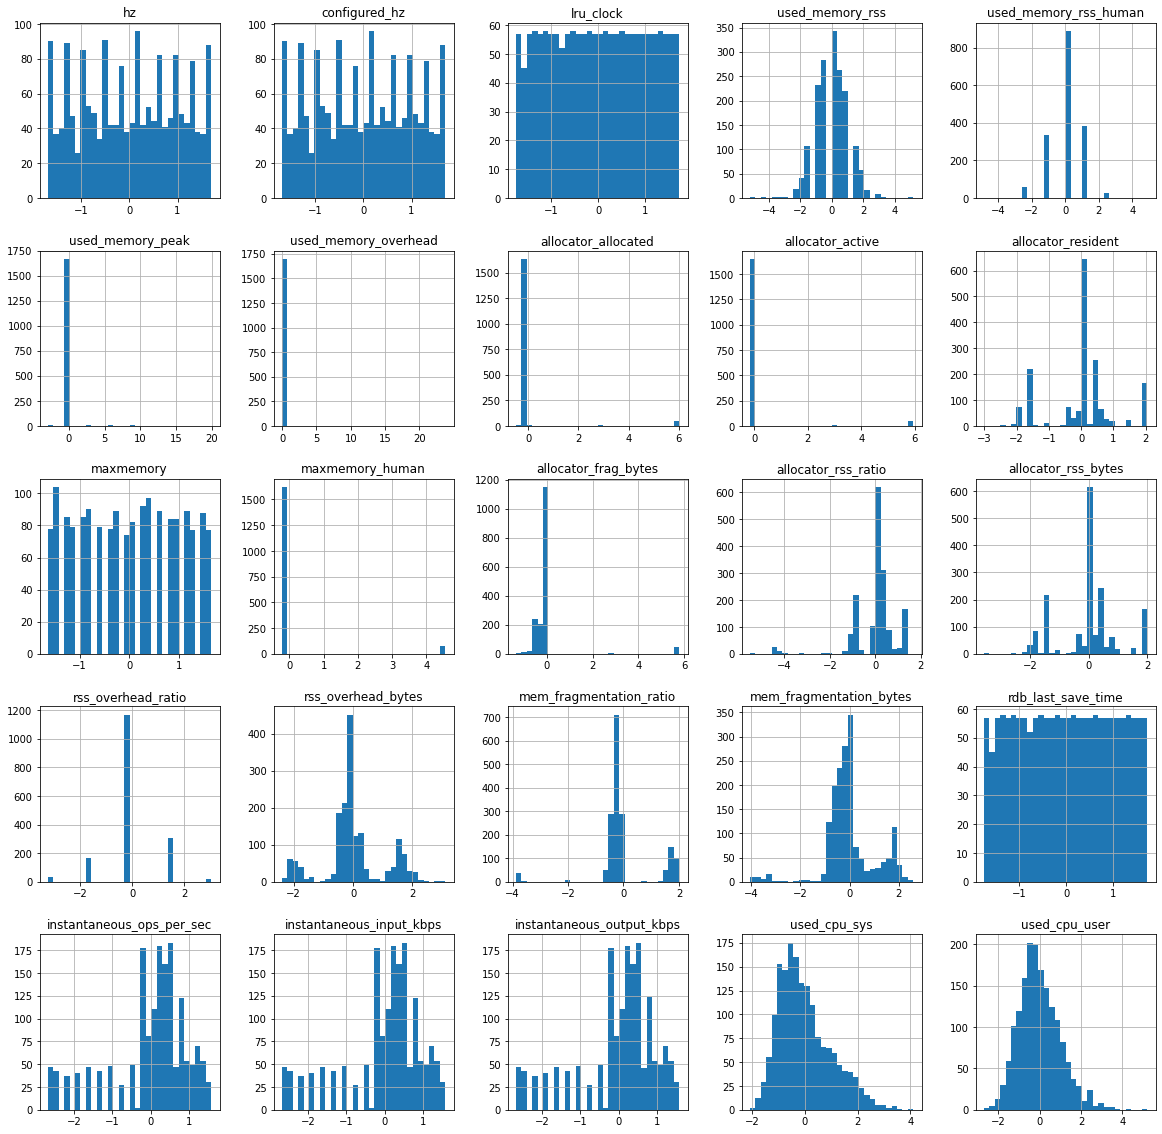

In [29]:
# 히스토그램으로 살펴보기
internalMetrics_df.hist(figsize=(20, 20), bins=30)

In [30]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [31]:
col = internalMetrics_df_drop.columns.tolist()
outlier_idx = []

# 컬럼별로 접근해서 인덱스 가져온다.
for col_name in col:
    idx = get_outlier(internalMetrics_df_drop, col_name)
    outlier_idx += list(idx)

outlier_idx = list(set(outlier_idx))  # 인데스 중복 삭제

# 인덱스 개수가 너무 많다. -> 몇개만 골라서 삭제하자
print(len(outlier_idx))

1268


In [32]:
# internal unique 한 결과 이상치 하나 삭제하는게 낫다고 판단 
# uptime_in_seconds = [  22   21   23 3304   25   24   26   27]
for i in internalMetrics_df_drop:
    print(i)
    print(internalMetrics_df_drop[i].unique())

hz
[ 0.22187203  1.35376767  1.44083656 -0.38761023  0.04773424  0.65721651
 -1.17123029 -0.47467913 -0.73588581  0.57014761 -0.56174802  0.8313543
 -0.64881692 -1.43243698 -1.69364366 -0.9100236  -0.82295471  0.91842319
  1.52790546 -1.08416139  0.13480314  1.00549209 -1.34536808 -0.21347244
  1.70204325  1.17962988  0.7442854  -0.9970925  -1.51950587 -0.30054134
  0.48307872  1.26669877  1.61497435  1.09256098 -1.60657477 -0.03933465
  0.39600982  0.30894093 -1.25829918 -0.12640355]
lru_clock
[-1.75288791 -1.749544   -1.74753766 ...  1.72343675  1.72561029
  1.72761664]
used_memory_rss
[ 1.4078655  -1.43574402  0.93393058 -0.48787418 -0.9618091   0.45999566
 -0.01393926 -2.38361386  1.88180042 -1.90967894  2.35573534 -4.27935354
  5.19934486 -2.85754878 -3.3314837   2.82967026 -5.22722338 -3.80541862
  3.30360518]
used_memory_rss_human
[ 1.23934957 -1.19918546  0.02008205 -2.41845298  2.45861709 -4.85698802
  4.89715212 -3.6377205   3.67788461]
used_memory_peak
[19.9104102  -0.094139

<AxesSubplot:>

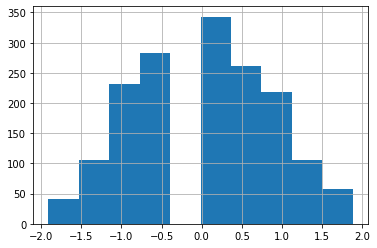

In [33]:
# used_memory_rss
used_memory_rss_idx = get_outlier(internalMetrics_df_drop, 'used_memory_rss')

internalMetrics_df_drop.drop(used_memory_rss_idx, axis=0)['used_memory_rss'].hist()

---

### 요인수 선택
* 요인 적재값
* 공통성
* 
* 클러스터링 개수 -> 각 클러스터마다 동등한 개수였으면 좋겠다

In [25]:
def factor_analysis(n_factors, df):
    fa = FactorAnalyzer(n_factors = n_factors, rotation='varimax')  # 객체 생성
    fa.fit(df)  # fitting
    df_fa = pd.DataFrame(fa.loadings_, index = df.columns)  # 데이터프레임으로 전달
    ev, v = fa.get_eigenvalues()
    return df_fa, ev

In [26]:
internalMetrics_fa, ev = factor_analysis(7, internalMetrics_df_drop)  ## 전체 데이터

# internalMetrics_df_drop = internalMetrics_normal_df
# internalMetrics_fa, ev = factor_analysis(6, internalMetrics_normal_df)  # 상관성 높은걸로 줄인거


In [27]:
# 요인수 선택 방법1 -> 요인수와 상관없다.
print(pd.DataFrame(ev))

               0
0   6.480942e+00
1   4.649951e+00
2   2.248490e+00
3   2.028986e+00
4   1.381778e+00
5   1.336082e+00
6   1.282956e+00
7   1.001613e+00
8   9.773386e-01
9   6.763205e-01
10  6.409300e-01
11  5.952383e-01
12  5.174854e-01
13  7.213276e-02
14  5.549906e-02
15  5.273050e-02
16  1.369587e-03
17  1.570196e-04
18  1.805569e-08
19  3.291439e-09
20  3.565567e-10
21 -6.646527e-16
22 -1.181442e-15
23 -1.885790e-15


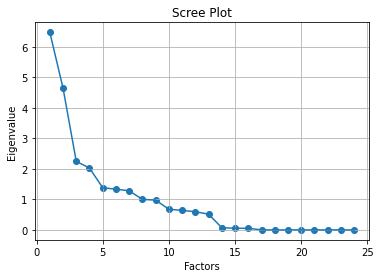

In [28]:
# 요인수 선택 방법2 -> 요인수와 상관없다
plt.scatter(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.plot(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<AxesSubplot:>

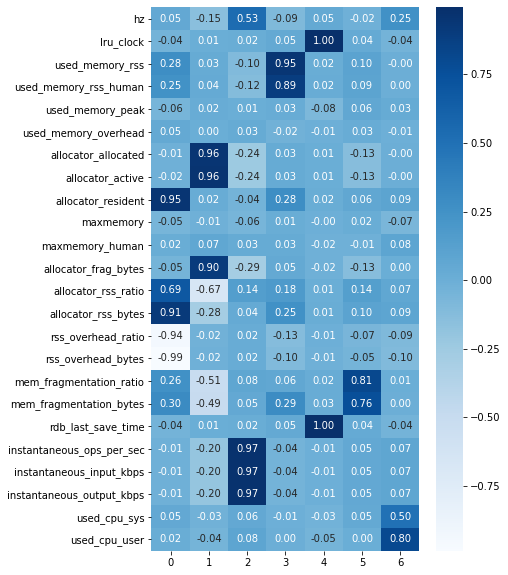

In [29]:
# 요인수 선택 방법3
# internal_metrics들이 포함되는 요인들 확인 -> 세로출이 거의다 포함되면 좋다.
plt.figure(figsize=(6,10))
sns.heatmap(internalMetrics_fa, cmap="Blues", annot=True, fmt='.2f')

---

## Clustering

In [30]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(internalMetrics_fa)

In [31]:
from sklearn.cluster import KMeans
def kmeans(n_clusters, df):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df)
    
    df['cluster'] = kmeans.labels_
    
    return df

In [32]:
kmeans_df = kmeans(2, internalMetrics_fa)

In [33]:
# 클러스터 개수 확인 함수
def clusters(df):
    
    # 총 개수 확인
    print(df['cluster'].value_counts())
    print()
    
    count_cluster = len(df['cluster'].unique())
    new_df = pd.DataFrame()
    metric_list = []
    
    for i in range(count_cluster):
        metric_list = list(df[df['cluster'] == i].index)
        print("len = {}".format(len(df[df['cluster'] == i])))
        print("cluster{}".format(i))
        for metric in metric_list:
            print(metric)
        print()
        
    return new_df

In [34]:
df = clusters(kmeans_df)

0    17
1     7
Name: cluster, dtype: int64

len = 17
cluster0
hz
lru_clock
used_memory_peak
used_memory_overhead
allocator_allocated
allocator_active
maxmemory
maxmemory_human
allocator_frag_bytes
rss_overhead_ratio
rss_overhead_bytes
rdb_last_save_time
instantaneous_ops_per_sec
instantaneous_input_kbps
instantaneous_output_kbps
used_cpu_sys
used_cpu_user

len = 7
cluster1
used_memory_rss
used_memory_rss_human
allocator_resident
allocator_rss_ratio
allocator_rss_bytes
mem_fragmentation_ratio
mem_fragmentation_bytes



### Elbow

In [35]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

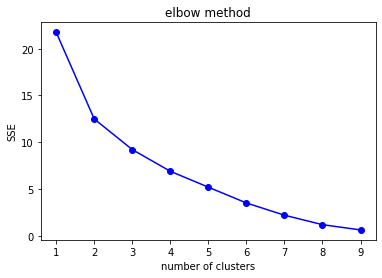

In [36]:
# 확 꺽이는 지점을 선택해야 한다. 
elbow(internalMetrics_fa, 10)

In [92]:
internalMetrics_fa.inertia_

AttributeError: 'DataFrame' object has no attribute 'inertia_'

In [93]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [94]:
visualize_silhouette_layer(internalMetrics_fa)

NameError: name 'silhouette_score' is not defined